In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

In [2]:
# Import data
top_pressures = pd.read_csv('Data_Airfoil_cleaned.csv', usecols=range(9, 20))
top_points = top_pressures.iloc[0:1, 0:]
top_pressures.drop(0, inplace=True)
top_pressures.head()
top_pressures = top_pressures.astype(float) * 6894.76
top_points.head()

bottom_pressures = pd.read_csv('Data_Airfoil_cleaned.csv', usecols=range(19, 30))
for col in bottom_pressures.columns[1:]:
    bottom_pressures.rename(columns={col: col[:-2]}, inplace=True)
bottom_points = bottom_pressures.iloc[0:1, 0:]
bottom_pressures.drop(0, inplace=True)
bottom_pressures = bottom_pressures.astype(float) * 6894.76

ambient_data = pd.read_csv('Data_Airfoil_cleaned.csv', usecols=range(1, 7))
ambient_data.drop(0, inplace=True)
ambient_data['q_WT corrected'] = ambient_data['q_WT corrected'].astype(float) * 6894.76
ambient_data['AmbPress'] = ambient_data['AmbPress'].astype(float) * 6894.76
ambient_data['AmbTemp'] = ambient_data['AmbTemp'].astype(float) * 5/9
ambient_data['AOA'] = ambient_data['AOA'].astype(float)

# ambient_data.head()
# bottom_points.head()

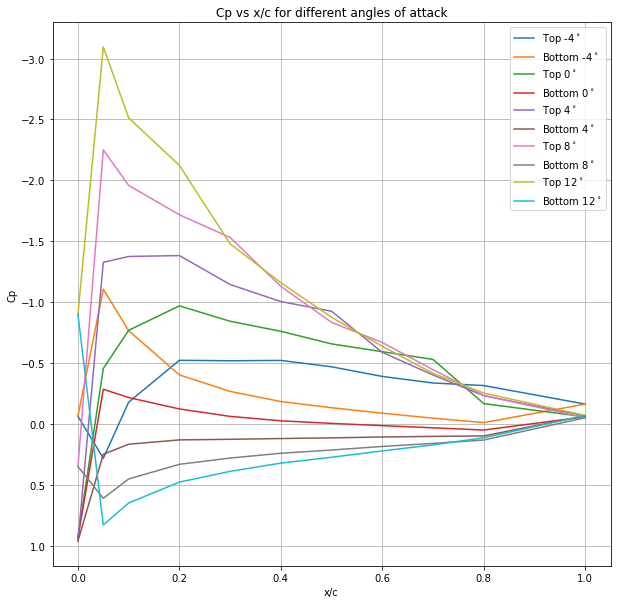

In [4]:
# Number 3
Cp_top = [(top_pressure)/(ambient_data['q_WT corrected'].values[i]) for i, top_pressure in enumerate(top_pressures.values)]
Cp_bottom = [(bottom_pressure)/(ambient_data['q_WT corrected'].values[i]) for i, bottom_pressure in enumerate(bottom_pressures.values)]
rho = ambient_data['AmbPress'].values/(287 * ambient_data['AmbTemp'].values)
fig, ax = plt.subplots(1,1, figsize=(10, 10))
for i in range(5):
    plt.plot(np.array(top_points.columns.astype(float)), np.array(Cp_top[2*i+1]), label='Top {}$^\circ$'.format(-4 + 4*i))
    plt.plot(np.array(bottom_points.columns.astype(float)), np.array(Cp_bottom[2*i+1]), label='Bottom {}$^\circ$'.format(-4 + 4*i))
ax.invert_yaxis()
plt.title('Cp vs x/c for different angles of attack')
plt.xlabel('x/c')
plt.ylabel('Cp')
plt.grid()
plt.legend()
plt.show()

In [5]:
#number 2
ambient_data['q_WT corrected']
velocity = np.sqrt((2*ambient_data['q_WT corrected']/rho))
mach = velocity / np.sqrt(1.4*287*ambient_data['AmbTemp'])
reynolds = rho * velocity * 0.0889 / 1.81e-5

In [54]:
def trunc_3_sig(float_point):
    if float_point == 0:
         return 0
    if float_point>1 or float_point<-1:
            return math.trunc(1000*float_point)/1000
    else:
        num = str('{:.20f}'.format(float_point))
        ind = 2
        neg = 0
        if float_point<0:
             ind = 3
             neg = 1
        while num[ind] == '0':
            ind +=1
        return math.trunc((10**(ind+1-neg))*float_point)/(10**(ind+1-neg))
# trunc_3_sig(0.0006345583)

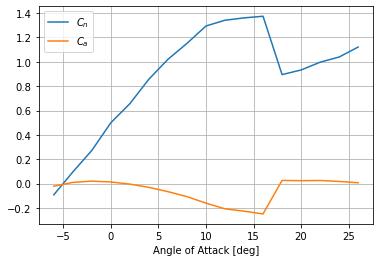

[-0.09158739279655388, 0.09556454195258937, 0.2727070424645677, 0.5001171856433656, 0.6565074211428673, 0.8575072291955367, 1.020195109784454, 1.1508375300713847, 1.2939576497458662, 1.341041418416403, 1.360432941676284, 1.3738687390075428, 0.894903505647002, 0.9329056988841116, 0.9965541240859764, 1.0392032126975006, 1.1210058462442682]
[-0.021303479679620988, 0.01018017320513108, 0.020820146819899785, 0.013611143853162297, -0.004013765729483401, -0.03037537792151616, -0.06564286333062455, -0.10654946972772997, -0.15998333409010485, -0.20683275356137068, -0.22598677372294018, -0.2484921267534709, 0.026411629259651462, 0.024204249721380588, 0.025751283294307606, 0.01811800567092208, 0.007070726448796518]


In [55]:
#number 1 Cn, Ca, Cl, CmLEx, CmLEy, Cmquarter
x_values_top = top_points.columns.astype(float)
y_values_top = top_points.values
x_values_bot = bottom_points.columns.astype(float)
y_values_bot = bottom_points.values

x_vals_total = np.append(np.array(x_values_top), np.array(x_values_bot))
y_vals_total = np.append(np.array(y_values_top), np.array(y_values_bot))

Cn_vec = []
Ca_vec = []
Cl_vec = []
CmLEx_vec = []
CmLEy_vec = []
alpha = np.array(ambient_data['AOA'])

for h in range(len(alpha)):
    Cp_total = np.append(Cp_top[h], Cp_bottom[h])
    Cn = 0
    Ca = 0
    CmLEx = 0
    CmLEy = 0
    for i in range(len(x_vals_total)-1):
        Cn += 0.5*(Cp_total[i]+Cp_total[i+1])*(x_vals_total[i+1]-x_vals_total[i])
        Ca += 0.5*(Cp_total[i]+Cp_total[i+1])*(y_vals_total[i+1]-y_vals_total[i])
        CmLEx += 0.5*(Cp_total[i]*x_vals_total[i]+Cp_total[i+1]*x_vals_total[i+1])*(x_vals_total[i]-x_vals_total[i+1])
        CmLEy += 0.5*(Cp_total[i]*y_vals_total[i]+Cp_total[i+1]*y_vals_total[i+1])*(y_vals_total[i]-y_vals_total[i+1])
    Ca = Ca*-1
    Cn_vec.append(Cn)
    Ca_vec.append(Ca)
    CmLEx_vec.append(CmLEx)
    CmLEy_vec.append(CmLEy)

    Cl = Cn*np.cos(np.radians(np.array(alpha)[h])) - Ca*np.sin(np.array(np.radians(alpha)[h]))
    Cl_vec.append(Cl)

CmLE_vec = np.array(CmLEx_vec) + np.array(CmLEy_vec)
Cmquarter_vec = np.array(CmLE_vec) + 0.25*np.array(Cl_vec)

#deliverables: Cn_vec, Ca_vec, CmLEx_vec, CmLEy_vec, Cl_vec, Cmquarter_vec
plt.plot(np.array(ambient_data['AOA'], dtype=int), Cn_vec, label = '$C_n$')
plt.plot(np.array(ambient_data['AOA'], dtype=int), Ca_vec, label = '$C_a$')
plt.xlabel('Angle of Attack [deg]')
plt.grid()
plt.legend()
plt.show()
print(Cn_vec)
print(Ca_vec)

vecs = np.array([Cn_vec, Ca_vec, Cl_vec, CmLEx_vec, CmLEy_vec, Cmquarter_vec]).T
for i in range(len(vecs)):
    for j in range(len(vecs[i])):
        vecs[i,j] = trunc_3_sig(vecs[i,j])

df = pd.DataFrame(vecs, columns=['Cn', 'Ca', 'Cl', 'Cmlex', 'Cmley', 'Cm1/4'])
df.to_csv('C:/Users/colin/Documents/AE_460/AE460-Fa23/lab_2/Coeffs.csv')

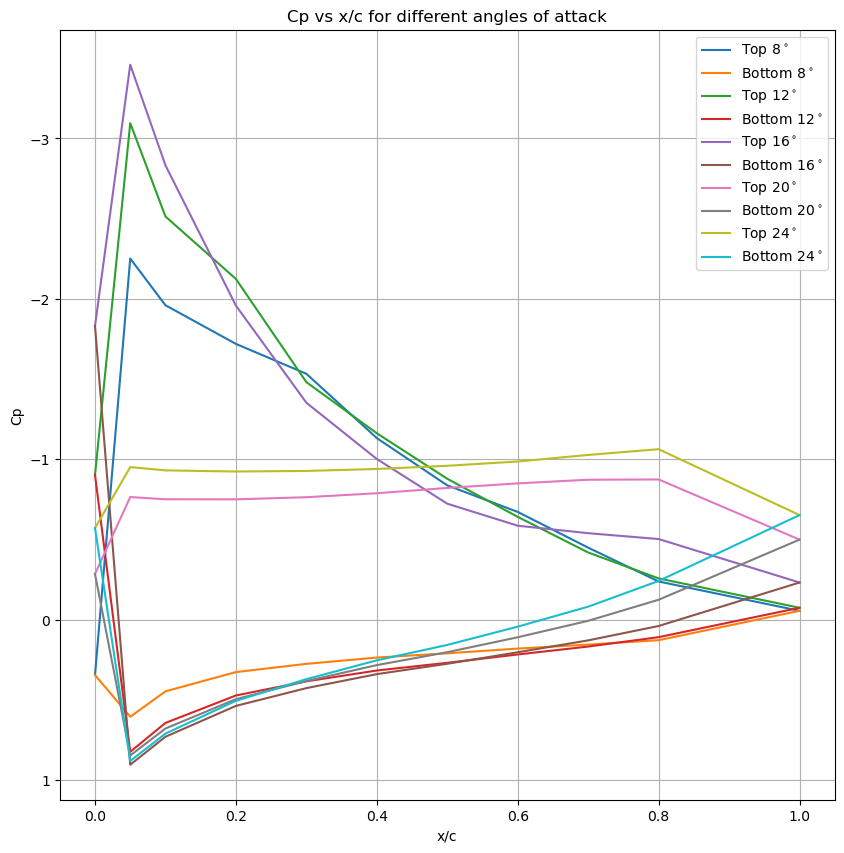

In [11]:
# Number 4
fig, ax = plt.subplots(1,1, figsize=(10, 10))
for i in range(5):
    plt.plot(top_points.columns.astype(float), Cp_top[2*i+7], label='Top {}$^\circ$'.format(8 + 4*i))
    plt.plot(bottom_points.columns.astype(float), Cp_bottom[2*i+7], label='Bottom {}$^\circ$'.format(8 + 4*i))
ax.invert_yaxis()
plt.title('Cp vs x/c for different angles of attack')
plt.xlabel('x/c')
plt.ylabel('Cp')
plt.grid()
plt.legend()
plt.show()

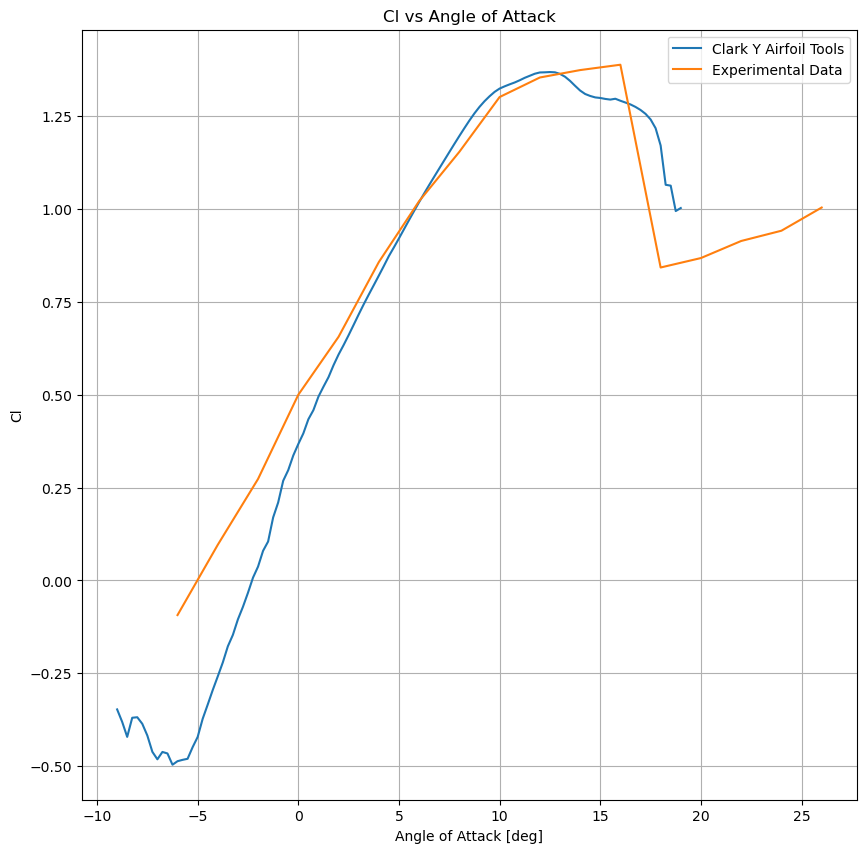

In [13]:
# Number 6
clark_y_data = pd.read_csv('xf-clarky-il-100000.csv')
fig, ax = plt.subplots(1,1, figsize=(10, 10))
ax.plot(clark_y_data['Alpha'], clark_y_data['Cl'], label='Clark Y Airfoil Tools')
ax.plot(ambient_data['AOA'], Cn_vec*np.cos(np.radians(ambient_data['AOA'])) - Ca_vec*np.sin(np.radians(ambient_data['AOA'])), label='Experimental Data')
ax.grid()
ax.set_xlabel('Angle of Attack [deg]')
ax.set_ylabel('Cl')
ax.set_title('Cl vs Angle of Attack')
ax.legend()
plt.show()

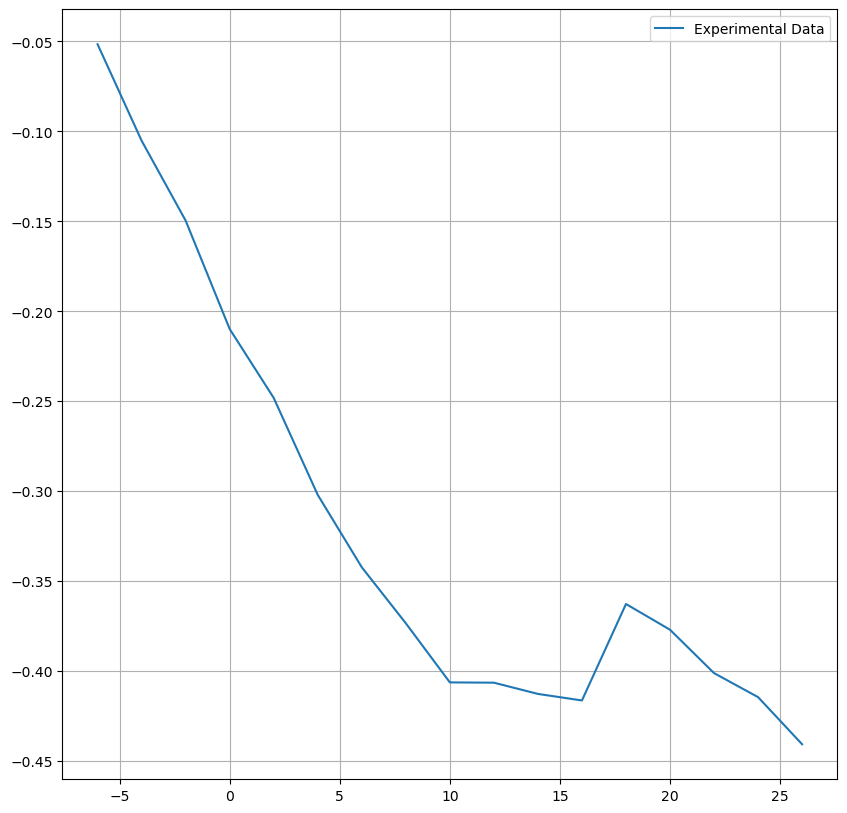

In [10]:
# Number 7

fig, ax = plt.subplots(1,1, figsize=(10, 10))
ax.plot(ambient_data['AOA'], CmLE_vec, label='Experimental Data')
ax.grid()
ax.legend()
plt.show()


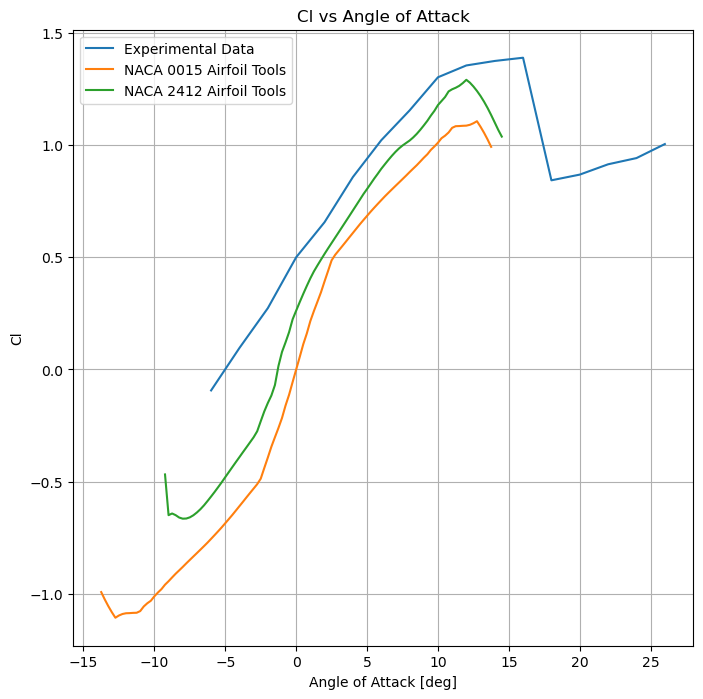

In [17]:
# Number 9
naca0015_data = pd.read_csv('xf-naca0015-il-100000.csv')
naca2412_data = pd.read_csv('xf-naca2412-il-100000.csv')
fig, ax = plt.subplots(1,1, figsize=(8, 8))
ax.plot(ambient_data['AOA'], Cl_vec, label='Experimental Data')
ax.plot(naca0015_data['Alpha'], naca0015_data['Cl'], label='NACA 0015 Airfoil Tools')
ax.plot(naca2412_data['Alpha'], naca2412_data['Cl'], label='NACA 2412 Airfoil Tools')
ax.legend()
ax.grid()
ax.set_xlabel('Angle of Attack [deg]')
ax.set_ylabel('Cl')
ax.set_title('Cl vs Angle of Attack')
plt.show()